翻译 https://www.kaggle.com/batzner/gini-coefficient-an-intuitive-explanation

# Gini Coefficient - An Intuitive Explanation

I was struggling a bit with the definition of the Scoring Metric. Googling "Gini Coefficient" gives you mostly economic explanations. Here is a descriptive explanation with regard to the challenge.

* 这次的评分度量方式是个啥?
* 谷歌**Gini Coefficient**，得到最常见的经济学解释？


First, let's define our predictions and their actual values:

* 首先，定义预测值和真实值。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.integrate

predictions = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

We use the Python implementation from the Gini coefficient discussion with code samples:

* 咱们用这里的Python实现 https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703

In [2]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

We calculate the Gini coefficient for the predictions:
    
* 计算基尼系数

In [4]:
gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini= gini_normalized(actual, predictions)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.189, Max. Gini: 0.300, Normalized Gini: 0.630


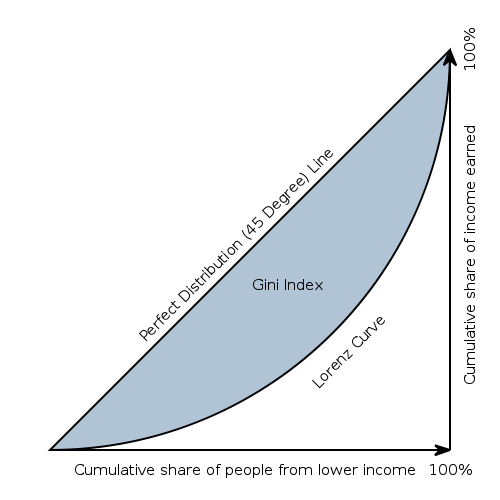

In [6]:
import os
from IPython.display import Image as PImage

PImage("500px-Economics_Gini_coefficient.svg.png")

So, how do we get this Gini of 0.189 and the Normalized Gini of 0.630?

* Gini: 0.189 是个啥？
* Max Gini: 0.300 又是个啥？
* Normalized Gini: 0.630 又是个啥？

## Economic Explanation

The first figure on the "Gini Coefficient" Wikipedia article is this one:

* 维基上的图。


They go through the population from poorest to richest and plot the running total / cumulative share of income, which gives them the Lorenz Curve. The Gini Coefficient is then defined as the blue area divided by the area of the lower triangle.

* x轴从最穷到最富，y轴累计收入占比，曲线叫做**Lorenz Curve**。
* 如果每个人收入都一样，则曲线是45度的直线。
* **Gini Coefficient**是蓝色部分面积比下面三角形的面积。


## Application to our challenge

Instead of going through the population from poorest to richest, we go through our predictions from lowest to highest.

* 在这个比赛中。
* 不是最穷到最富，而是按预测值从低到高排列。

Instead of summing up the income, we sum up the actual values of our predictions:

* 不是累加收入，而是累加真实值。


In [7]:
# Sort the actual values by the predictions
data = zip(actual, predictions)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]
print('Sorted Actual Values', sorted_actual)

Sorted Actual Values [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


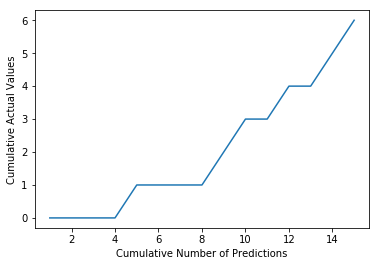

In [8]:
# Sum up the actual values
cumulative_actual = np.cumsum(sorted_actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1)

plt.plot(cumulative_index, cumulative_actual)
plt.xlabel('Cumulative Number of Predictions')
plt.ylabel('Cumulative Actual Values')
plt.show()